# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [3]:
# my usual imports and setups
import os
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import numpy as np
import os
import sys

#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [4]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [6]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [8]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [12]:
#dropping some data I no longer need
#... your code here...
df=df[['tripduration','start station id','start station latitude','start station longitude','end station id','end station latitude','end station longitude','bikeid','birth year','gender','ageM','ageF']]

In [14]:
df.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
0,1346,455,40.750020,-73.969053,265,40.722293,-73.991475,18660,1960.0,2,NaN,55.0
1,363,434,40.743174,-74.003664,482,40.739355,-73.999318,16085,1963.0,1,52.0,NaN
2,346,491,40.740964,-73.986022,505,40.749013,-73.988484,20845,1974.0,1,41.0,NaN
3,182,384,40.683178,-73.965964,399,40.688515,-73.964763,19610,1969.0,1,46.0,NaN
4,969,474,40.745168,-73.986831,432,40.726218,-73.983799,20197,1977.0,1,38.0,NaN


In [15]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [16]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

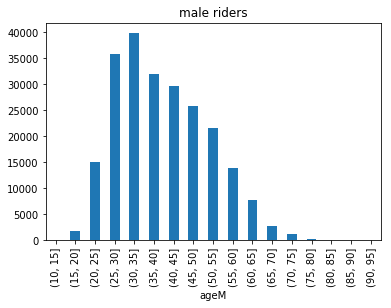

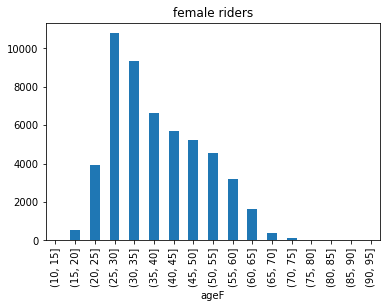

In [17]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


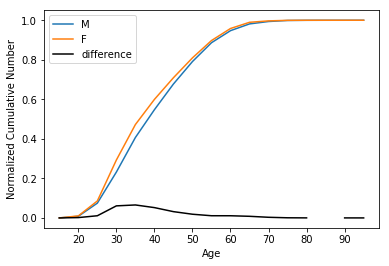

In [18]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [19]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [21]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.09128675483027056, pvalue=1.1723000718567192e-307)


**  FILL IN THE CELL BELOW!**

In [15]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

#here is my answer to the question: KS test returned statistic=0.09128675483027056, pvalue=1.1723000718567192e-307, it means pvalue is smaller than 0.05 so the null hypothesis can be rejected



The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

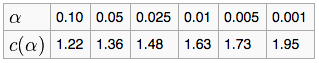

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [33]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df_red = df.sample(n = int(len(df)/200), random_state = 1994)
df_red.head()


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
63932,343,461,40.735877,-73.982050,444,40.742354,-73.989151,19857,1987.0,1,28.0,NaN
208274,219,305,40.760958,-73.967245,137,40.761628,-73.972924,20360,1977.0,1,38.0,NaN
281594,1269,478,40.760301,-73.998842,537,40.740259,-73.984092,17862,1981.0,2,NaN,34.0
121340,435,383,40.735238,-74.000271,317,40.724537,-73.981854,18296,1982.0,1,33.0,NaN
80623,269,470,40.743453,-74.000040,435,40.741740,-73.994156,16209,1962.0,1,53.0,NaN


In [37]:
df_red['ageM'].dropna(inplace= True)
df_red['ageF'].dropna(inplace= True)

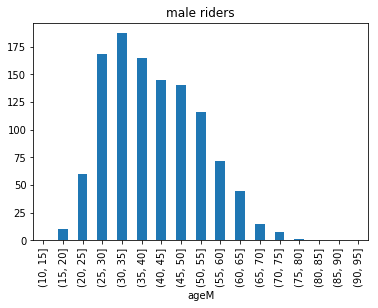

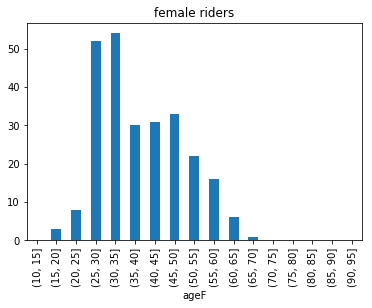

In [38]:
bins = np.arange(10, 99, 5)

axM = df_red.ageM.groupby(pd.cut(df_red.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df_red.ageF.groupby(pd.cut(df_red.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.002885
(20, 25]       0.018869
(25, 30]       0.035846
(30, 35]       0.081590
(35, 40]       0.053017
(40, 45]       0.046019
(45, 50]       0.051251
(50, 55]       0.034715
(55, 60]       0.033610
(60, 65]       0.017295
(65, 70]       0.007951
(70, 75]       0.000883
(75, 80]       0.000000
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


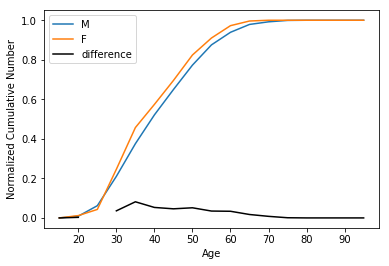

In [39]:
csM=df_red.ageM.groupby(pd.cut(df_red.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df_red.ageF.groupby(pd.cut(df_red.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [40]:
ks = scipy.stats.ks_2samp(df_red.ageM, df_red.ageF)
print(ks)

Ks_2sampResult(statistic=0.10632453621908061, pvalue=0.016388632168425503)


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

In [43]:
df_red_m = np.random.choice(df['ageM'].dropna(),size = df['ageF'].count())
df_red_f = df['ageF'].dropna()

df_red2 = pd.DataFrame([df_red_m, df_red_f]).T
df_red2.columns = ('male','female')

print(df_red2.shape)
df_red2.head()

(52093, 2)


,male,female
0,59.0,55.0
1,39.0,46.0
2,42.0,30.0
3,31.0,19.0
4,33.0,26.0


# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [44]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

df_red2['male'] = df_red2['male'].sort_values().values
df_red2['female'] = df_red2['female'].sort_values().values
pearson_sample = scipy.stats.pearsonr(df_red2.male, df_red2.female)
pearson_sample
#null hypothesis can be rejected

(0.99569409111378693, 0.0)

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [45]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

spearman_sample = scipy.stats.spearmanr(df_red2.male, df_red2.female)
spearman_sample
#null hypothesis can be rejected

SpearmanrResult(correlation=0.99919427799997529, pvalue=0.0)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

In [71]:
#here starts part 2
import numpy as np
import os
import sys

# Revise the function to support the datasets after 201612
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.csv.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

datestring03='201803'
getCitiBikeCSV(datestring03)
df03 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring03 + '-citibike-tripdata.csv')
df03['date'] = pd.to_datetime(df09['starttime'])
df03.head()

('Downloading', '201803')
file in place, you can continue


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,816,2018-03-01 02:29:13.7270,2018-03-01 02:42:50.1460,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,31413,Subscriber,1973,1,2018-09-01 00:00:05.269
1,235,2018-03-01 05:12:37.0320,2018-03-01 05:16:32.1010,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,33202,Subscriber,1965,1,2018-09-01 00:00:11.281
2,1250,2018-03-01 05:45:49.9000,2018-03-01 06:06:39.9080,72,W 52 St & 11 Ave,40.767272,-73.993929,3664,North Moore St & Greenwich St,40.720195,-74.010301,26675,Subscriber,1984,1,2018-09-01 00:00:20.649
3,741,2018-03-01 06:54:19.6150,2018-03-01 07:06:40.9790,72,W 52 St & 11 Ave,40.767272,-73.993929,459,W 20 St & 11 Ave,40.746745,-74.007756,31011,Subscriber,1981,1,2018-09-01 00:00:21.746
4,727,2018-03-01 07:08:38.8610,2018-03-01 07:20:46.8500,72,W 52 St & 11 Ave,40.767272,-73.993929,2006,Central Park S & 6 Ave,40.765909,-73.976342,30616,Subscriber,1990,2,2018-09-01 00:00:27.315


In [72]:
datestring09 = '201809'
getCitiBikeCSV(datestring09)
df09 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring09 + '-citibike-tripdata.csv')
df09['date'] = pd.to_datetime(df09['starttime'])
df09.head()

('Downloading', '201809')
file in place, you can continue


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1635,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1,2018-09-01 00:00:05.269
1,132,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0,2018-09-01 00:00:11.281
2,3337,2018-09-01 00:00:20.6490,2018-09-01 00:55:58.5470,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1,2018-09-01 00:00:20.649
3,436,2018-09-01 00:00:21.7460,2018-09-01 00:07:38.5830,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2,2018-09-01 00:00:21.746
4,8457,2018-09-01 00:00:27.3150,2018-09-01 02:21:25.3080,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1,2018-09-01 00:00:27.315


In [73]:
df03['tripduration_d'] = df03['tripduration'][(df03['date'].dt.hour >= 6) & (df03['date'].dt.hour < 18)] / 60
df03['tripduration_n'] = df03['tripduration'][(df03['date'].dt.hour < 6) | (df03['date'].dt.hour >= 18)] / 60
print(df03.shape)
df03.head()

(976672, 18)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,tripduration_d,tripduration_n
0,816,2018-03-01 02:29:13.7270,2018-03-01 02:42:50.1460,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,31413,Subscriber,1973,1,2018-09-01 00:00:05.269,NaN,13.600000
1,235,2018-03-01 05:12:37.0320,2018-03-01 05:16:32.1010,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,33202,Subscriber,1965,1,2018-09-01 00:00:11.281,NaN,3.916667
2,1250,2018-03-01 05:45:49.9000,2018-03-01 06:06:39.9080,72,W 52 St & 11 Ave,40.767272,-73.993929,3664,North Moore St & Greenwich St,40.720195,-74.010301,26675,Subscriber,1984,1,2018-09-01 00:00:20.649,NaN,20.833333
3,741,2018-03-01 06:54:19.6150,2018-03-01 07:06:40.9790,72,W 52 St & 11 Ave,40.767272,-73.993929,459,W 20 St & 11 Ave,40.746745,-74.007756,31011,Subscriber,1981,1,2018-09-01 00:00:21.746,NaN,12.350000
4,727,2018-03-01 07:08:38.8610,2018-03-01 07:20:46.8500,72,W 52 St & 11 Ave,40.767272,-73.993929,2006,Central Park S & 6 Ave,40.765909,-73.976342,30616,Subscriber,1990,2,2018-09-01 00:00:27.315,NaN,12.116667


In [74]:
df03.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,tripduration_d,tripduration_n
count,9.766720e+05,976672.000000,976672.000000,976672.000000,976672.000000,976672.000000,976672.000000,976672.000000,976672.000000,976672.000000,684865.000000,291807.000000
mean,8.819937e+02,1498.556608,40.737436,-73.982980,1488.513184,40.737107,-73.983265,26422.016170,1978.006442,1.154847,13.997445,16.348532
std,2.743450e+04,1412.410357,0.033025,0.018135,1410.161032,0.032750,0.018205,5976.227732,12.079189,0.506665,331.579441,664.613865
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.055701,14529.000000,1885.000000,0.000000,1.016667,1.016667
25%,3.240000e+02,377.000000,40.718939,-73.994685,369.000000,40.718822,-73.994903,20367.000000,1969.000000,1.000000,NaN,NaN
50%,5.330000e+02,498.000000,40.739126,-73.985649,497.000000,40.739017,-73.986580,28407.000000,1980.000000,1.000000,NaN,NaN
75%,9.040000e+02,3177.000000,40.756687,-73.974023,3176.000000,40.756405,-73.974987,31433.000000,1988.000000,1.000000,NaN,NaN
max,1.502093e+07,3674.000000,45.506264,-73.568906,3674.000000,45.506264,-73.568906,33551.000000,2002.000000,2.000000,207988.716667,250348.900000


In [81]:
df03['tripduration_n'].dropna(inplace = True)
df03['tripduration_d'].dropna(inplace= True)

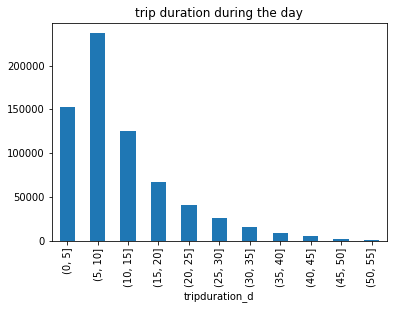

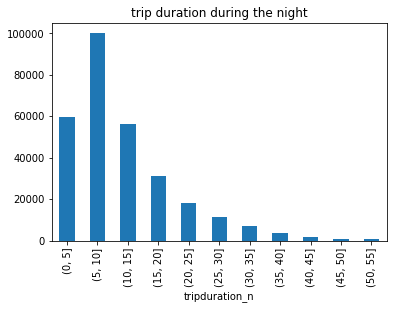

In [82]:
bins = np.arange(0, 60, 5)
axD = df03.tripduration_d.groupby(pd.cut(df03.tripduration_d, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axD.set_title("trip duration during the day")

axN = df03.tripduration_n.groupby(pd.cut(df03.tripduration_n, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axN.set_title("trip duration during the night");

                count_nonzero
tripduration_d               
(0, 5]               0.019652
(5, 10]              0.022382
(10, 15]             0.012986
(15, 20]             0.003702
(20, 25]             0.000567
(25, 30]             0.000236
(30, 35]             0.000627
(35, 40]             0.000421
(40, 45]             0.000360
(45, 50]             0.000202
(50, 55]             0.000000


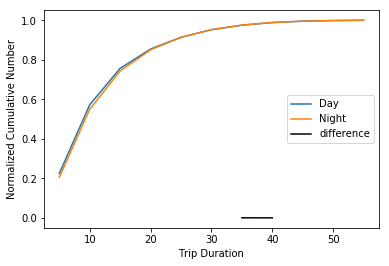

In [83]:
csD=df03.tripduration_d.groupby(pd.cut(df03.tripduration_d, bins)).agg([count_nonzero]).cumsum()
csN=df03.tripduration_n.groupby(pd.cut(df03.tripduration_n, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-', label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [84]:
ks = scipy.stats.ks_2samp(df03.tripduration_d, df03.tripduration_n)
print (ks)
#null hypothesis can be rejected

Ks_2sampResult(statistic=0.023235547667571597, pvalue=1.9679910084106197e-96)


In [87]:
df03_red = df03.sample(n=int(len(df03)/300),random_state=1994)
df03_red['tripduration_d'].dropna(inplace= True)
df03_red['tripduration_n'].dropna(inplace= True)

In [88]:
ks = scipy.stats.ks_2samp(df03_red.tripduration_d, df03_red.tripduration_n)
print (ks)
#null hypothesis can be rejected

Ks_2sampResult(statistic=0.02588288702955281, pvalue=0.74548740090878352)


In [89]:
df03_red_day = np.random.choice(df03['tripduration_d'].dropna(),size = df03['tripduration_n'].count())
df03_red_night = df03['tripduration_n'].dropna()

df03_red2 = pd.DataFrame([df03_red_day, df03_red_night]).T
df03_red2.columns = ('tripduration_day','tripduration_night')

df03_red2.head()

,tripduration_day,tripduration_night
0,8.716667,13.600000
1,4.233333,3.916667
2,17.983333,20.833333
3,15.133333,12.350000
4,12.400000,12.116667


In [91]:
df03_red2.describe()

,tripduration_day,tripduration_night
count,291807.000000,291807.000000
mean,13.553965,16.348532
std,207.524244,664.613865
min,1.016667,1.016667
25%,5.316667,5.600000
50%,8.750000,9.150000
75%,14.883333,15.416667
max,80755.350000,250348.900000


In [92]:
df03_red2['tripduration_day'] = df03_red2['tripduration_day'].sort_values().values
df03_red2['tripduration_night'] = df03_red2['tripduration_night'].sort_values().values
df03_red2.head()

,tripduration_day,tripduration_night
0,1.016667,1.016667
1,1.016667,1.016667
2,1.016667,1.016667
3,1.016667,1.016667
4,1.016667,1.016667


In [93]:
pearson= scipy.stats.pearsonr(df03_red2.tripduration_day, df03_red2.tripduration_night)
pearson
#null hypothesis can be rejected

(0.98555755925485311, 0.0)

In [94]:
spearman = scipy.stats.spearmanr(df03_red2.tripduration_day, df03_red2.tripduration_night)
spearman 
#null hypothesis can be rejected

SpearmanrResult(correlation=0.99999912079606157, pvalue=0.0)